In [1]:
pwd

'/content'

In [2]:
# pandas, numpy
import pandas as pd
import numpy as np

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 전처리
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

#모델링
from keras import Sequential
from keras.layers import *

In [3]:
train = pd.read_csv('/content/drive/MyDrive/train.csv')
test = pd.read_csv('/content/drive/MyDrive/test.csv')
sub = pd.read_csv('/content/drive/MyDrive/submission.csv')

In [4]:
print(train.shape)
print(test.shape)


(2048, 787)
(20480, 786)


In [5]:
train.columns

Index(['id', 'digit', 'letter', '0', '1', '2', '3', '4', '5', '6',
       ...
       '774', '775', '776', '777', '778', '779', '780', '781', '782', '783'],
      dtype='object', length=787)

In [6]:
train

,id,digit,letter,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,1,5,L,1,1,1,4,3,0,0,...,2,1,0,1,2,4,4,4,3,4
1,2,0,B,0,4,0,0,4,1,1,...,0,3,0,1,4,1,4,2,1,2
2,3,4,L,1,1,2,2,1,1,1,...,3,3,3,0,2,0,3,0,2,2
3,4,9,D,1,2,0,2,0,4,0,...,3,3,2,0,1,4,0,0,1,1
4,5,6,A,3,0,2,4,0,3,0,...,4,4,3,2,1,3,4,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,2044,6,V,2,4,3,4,2,4,4,...,0,2,2,0,0,1,3,1,4,0
2044,2045,1,L,3,2,2,1,1,4,0,...,2,3,4,2,1,2,3,4,1,1
2045,2046,9,A,4,0,4,0,2,4,4,...,2,3,1,1,3,4,2,2,0,0
2046,2047,0,Z,2,3,3,0,3,0,4,...,2,3,1,1,0,4,1,4,3,1


In [7]:
test

,id,letter,0,1,2,3,4,5,6,7,...,774,775,776,777,778,779,780,781,782,783
0,2049,L,0,4,0,2,4,2,3,1,...,2,0,4,2,2,4,3,4,1,4
1,2050,C,4,1,4,0,1,1,0,2,...,0,3,2,4,2,4,2,2,1,2
2,2051,S,0,4,0,1,3,2,3,0,...,1,3,2,0,3,2,3,0,1,4
3,2052,K,2,1,3,3,3,4,3,0,...,3,0,3,2,4,1,0,4,4,4
4,2053,W,1,0,1,1,2,2,1,4,...,4,3,1,4,0,2,1,2,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20475,22524,P,1,2,1,1,0,0,0,2,...,0,1,3,0,3,0,4,3,1,4
20476,22525,S,4,1,1,4,0,0,1,1,...,1,3,1,0,0,1,3,1,2,0
20477,22526,B,4,2,1,3,2,1,3,0,...,3,2,3,4,1,0,3,3,1,1
20478,22527,K,1,1,2,3,4,0,4,3,...,2,0,0,4,3,3,3,4,4,2


In [34]:
# train데이터가 부족하다 증강필요함
print("데이터의 형태(행, 열):", train.shape) 
train.head()

데이터의 형태(행, 열): (2048, 787)


,id,digit,letter,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,1,5,L,1,1,1,4,3,0,0,...,2,1,0,1,2,4,4,4,3,4
1,2,0,B,0,4,0,0,4,1,1,...,0,3,0,1,4,1,4,2,1,2
2,3,4,L,1,1,2,2,1,1,1,...,3,3,3,0,2,0,3,0,2,2
3,4,9,D,1,2,0,2,0,4,0,...,3,3,2,0,1,4,0,0,1,1
4,5,6,A,3,0,2,4,0,3,0,...,4,4,3,2,1,3,4,3,1,2


In [33]:
print("데이터의 형태(행, 열):", test.shape) 
test.head()

데이터의 형태(행, 열): (20480, 786)


,id,letter,0,1,2,3,4,5,6,7,...,774,775,776,777,778,779,780,781,782,783
0,2049,L,0,4,0,2,4,2,3,1,...,2,0,4,2,2,4,3,4,1,4
1,2050,C,4,1,4,0,1,1,0,2,...,0,3,2,4,2,4,2,2,1,2
2,2051,S,0,4,0,1,3,2,3,0,...,1,3,2,0,3,2,3,0,1,4
3,2052,K,2,1,3,3,3,4,3,0,...,3,0,3,2,4,1,0,4,4,4
4,2053,W,1,0,1,1,2,2,1,4,...,4,3,1,4,0,2,1,2,3,4


[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Digit(Target)')]

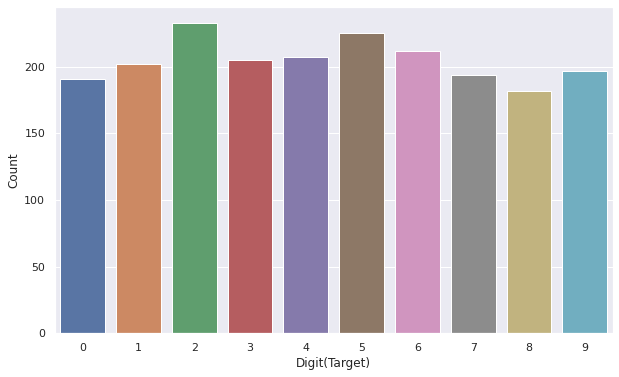

In [9]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="digit", data=train)
ax.set(xlabel='Digit(Target)', ylabel='Count')

In [ ]:
# 시각화

[Text(0, 0.5, 'count'), Text(0.5, 0, 'letter')]

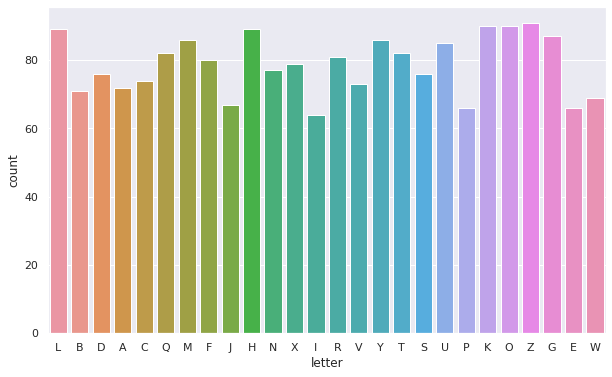

In [10]:
plt.figure(figsize=(10,6))
sns.set_theme(style = "darkgrid")
ax = sns.countplot(x='letter',data=train)
ax.set(xlabel='letter',ylabel='count')

In [11]:
#쓸데없는 컬럼 날리기
train2 = train.drop(['id','digit','letter'],1)
test2 = test.drop(['id','letter'],1)

<ipython-input-11-44b4f090900e>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train2 = train.drop(['id','digit','letter'],1)
<ipython-input-11-44b4f090900e>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  test2 = test.drop(['id','letter'],1)


In [12]:
#데이터프레임 array배열로 변경
train2 = train2.values.reshape(-1,28,28,1)
test2 = test2.values.reshape(-1,28,28,1)

In [13]:
train2.shape

(2048, 28, 28, 1)

In [14]:
test2.shape

(20480, 28, 28, 1)

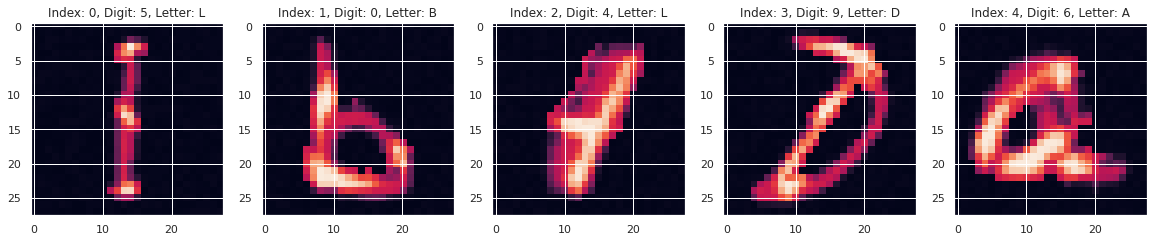

In [15]:
plt.figure(figsize=(20,4))
for i in range(5):
    img = train2[i].reshape(28,28)
    digit = train.loc[i, 'digit']
    letter = train.loc[i, 'letter']
    plt.subplot(1,5, i + 1)
    plt.title('Index: %i, Digit: %s, Letter: %s'%(i, digit, letter))
    plt.imshow(img)

In [16]:
# 데이터 정규화
train2 = train2/255.0
test2 = test2/255.0

In [17]:
# validation 생성
x_train, x_valid, y_train, y_valid = train_test_split(train2, train['digit'], test_size=0.2, random_state=42, stratify = train['digit'])

In [18]:
idg = ImageDataGenerator(rotation_range=45,
                                width_shift_range=0.1,
                                 height_shift_range=0.1,
                                 shear_range=0.2,
                                 zoom_range=0.2)
idg2 = ImageDataGenerator()

train_generator = idg.flow(x_train,y_train)
valid_generator = idg2.flow(x_valid,y_valid)
test_generator = idg2.flow(test2,shuffle=False)

In [20]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
# callback(EarlyStopping,ModelCheckpoint,ReduceLROnPlateau) 지정
early_stopping=EarlyStopping(min_delta = 0, patience=10)
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5',verbose=1,save_best_only = True)
reLR = ReduceLROnPlateau(patience=20, verbose=1, factor=0.5)

In [35]:
# 모델 생성 및 학습
model = Sequential()

In [22]:
model.add(Conv2D(32, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(32, (2, 2), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [23]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
hist = model.fit(x_train,y_train, batch_size=32,epochs=100,validation_data=(x_valid,y_valid),callbacks=[checkpointer,early_stopping,reLR],verbose =2,shuffle =True)

In [25]:
hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc', 'lr'])

In [26]:
model.load_weights('/content/drive/MyDrive/Colab Notebooks/model.weights.best.hdf5')

In [27]:
result = model.predict(test_generator, verbose=True)

640/640 [==============================] - 2s 3ms/step


In [ ]:
#교차검증
from sklearn.model_selection import StratifiedGroupKFold
skf = StratifiedGroupKFold(n_splits=5, random_state=42, shuffle = True)\

result = 0

for train_index, valid_index in skf.split(train2,train['digit']) :
    
  mc = ModelCheckpoint('best_cvision.h5',save_best_only=True, verbose=1)
  
  x_train = train2[train_index]
  x_valid = train2[valid_index]    
  y_train = train['digit'][train_index]
  y_valid = train['digit'][valid_index]
  
  train_generator = idg.flow(x_train,y_train)
  valid_generator = idg2.flow(x_valid,y_valid)
  test_generator = idg2.flow(test2,shuffle=False)

  model = Sequential()
  model.add(Conv2D(32, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(28, 28, 1)))
  model.add(BatchNormalization())
  model.add(Conv2D(32, (2, 2), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPool2D((2, 2)))
  model.add(Dropout(0.2))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPool2D((2, 2)))
  model.add(Dropout(0.3))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPool2D((2, 2)))
  model.add(Dropout(0.4))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))

  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['acc'])


  learning_history = model.fit(train_generator,epochs=100, validation_data=valid_generator, callbacks=[checkpointer,early_stopping,reLR])

  # predict
  model.load_weights('model.weights.best.hdf5')
  result += model.predict(test_generator,verbose=True)/5

In [ ]:
sub['digit'] = result.argmax(1)

In [ ]:
sub.to_csv('Dacon_cvision_school.csv',index=False)